Bike sharing demand prediction

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display,HTML
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

import os



In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Exploratery data analysis

In [3]:
df=pd.read_excel('/content/gdrive/MyDrive/Ciencia de Datos/Taller 2/Data_Taller_2.xlsx')
df.head()

,instant,Date,Year,Month,Day,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1.0,2020-01-01,2020.0,1.0,1.0,Springer,No,Mist + Cloudy,8175849.0,9.090375e+06,0.805833,10749882.0,331.0,654.0,985.0
1,2.0,2020-01-02,2020.0,1.0,2.0,Springer,No,Mist + Cloudy,9083466.0,8.625733e+06,0.696087,-16652113.0,131.0,670.0,801.0
2,3.0,2020-01-03,2020.0,1.0,3.0,Springer,No,Few clouds,1229108.0,9.020350e-01,0.437273,16636703.0,120.0,1229.0,1349.0
3,4.0,2020-01-04,2020.0,1.0,4.0,Springer,No,Few clouds,1.4,1.969734e+06,0.590435,10739832.0,108.0,1454.0,1562.0
4,5.0,2020-01-05,2020.0,1.0,5.0,Springer,No,Partly cloudy,2666979.0,2.775690e+05,0.436957,125223.0,82.0,1518.0,1600.0


In [4]:
df.shape

(726, 15)

In [5]:
df.dtypes

instant              float64
Date          datetime64[ns]
Year                 float64
Month                float64
Day                  float64
Season                object
Holiday               object
Weather               object
Temp                 float64
Feel_Temp            float64
Hum                  float64
Wind                 float64
Casual               float64
Registered           float64
cnt                  float64
dtype: object

Describe the dataset

In [6]:
df.describe()

,instant,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
count,726.000000,726.000000,726.000000,726.000000,7.260000e+02,7.260000e+02,726.000000,7.260000e+02,726.000000,726.000000,726.000000
mean,365.710744,2020.500000,6.519284,15.716253,3.601389e+05,4.914979e+05,0.668853,1.849241e+06,849.630854,3662.168044,4511.798898
std,211.050219,0.500345,3.451982,8.820474,3.401804e+06,3.025228e+06,0.660150,5.905126e+06,687.738418,1558.369158,1935.613470
min,1.000000,2020.000000,1.000000,1.000000,-5.220871e+07,-4.283729e+07,0.000000,-1.665211e+07,2.000000,20.000000,22.000000
25%,183.250000,2020.000000,4.000000,8.000000,1.013415e+01,1.036619e+01,0.520521,9.177811e+00,316.250000,2506.250000,3191.000000
50%,365.500000,2020.500000,7.000000,16.000000,1.851585e+01,1.757759e+01,0.626250,1.266732e+01,717.000000,3669.500000,4551.000000
75%,547.750000,2021.000000,10.000000,23.000000,2.551686e+01,2.300731e+01,0.731042,1.830216e+01,1096.500000,4783.250000,5966.000000
max,731.000000,2021.000000,12.000000,31.000000,1.894665e+07,1.751766e+07,10.867083,6.000868e+07,3410.000000,6946.000000,8714.000000


Type casting the datetime and categorical attributes

In [7]:


df['Season']=df.Season.astype('category')
df['Year']=df.Year.astype('category')
df['Month']=df.Month.astype('category')
df['Holiday']=df.Holiday.astype('category')
df['Weather']=df.Weather.astype('category')


Attributes distribution and trends

Season wise hourly distribution of counts

Regression analysis

In [8]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

Split the training dataset

In [9]:
X_train,X_test,y_train,y_test= train_test_split(df.iloc[:,0:-3],df['cnt'],test_size=0.3,random_state=42)

X_train=X_train.reset_index() 
y_train=y_train.reset_index()

X_test=X_test.reset_index() 
y_test=y_test.reset_index() 

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(508, 13) (218, 13) (508, 2) (218, 2)
   index     cnt
0    327  3068.0
1    449  5698.0
2    104   795.0
3    114  4400.0
4    651  7461.0
   index     cnt
0    326  2792.0
1    519  7055.0
2    580  7273.0
3     33  1550.0
4    570  6685.0


Normality test(probability plot)

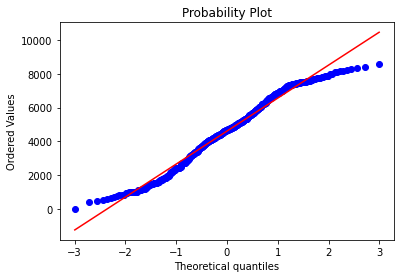

In [11]:
import scipy
from scipy import stats
stats.probplot(y_train.cnt.tolist(),dist='norm',plot=plt)
plt.show()

Split the features into categorical and numerical features

In [12]:
training_features=X_train[['Season','Holiday','Weather','Month','Year','Temp','Feel_Temp','Hum','Wind']]
categorical_features=['Season','Holiday','Weather']
numerical_features=[['Temp','Feel_Temp','Hum','Wind','Month','Year']]

Decoding the training features

In [13]:
training_attributes=pd.get_dummies(training_features,columns=categorical_features)
training_attributes.head()

,Month,Year,Temp,Feel_Temp,Hum,Wind,Season_Fall,Season_Springer,Season_Summer,Season_Winter,...,Weather_ Partly cloudy,Weather_Clear,Weather_Few clouds,Weather_Light Rain + Scattered clouds,Weather_Mist,Weather_Mist + Broken clouds,Weather_Mist + Cloudy,Weather_Mist + Few clouds,Weather_Rain + Thunderstorm,Weather_Snow
0,11.0,2020.0,9.664151,10.099089,0.681667,4.584194,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,3.0,2021.0,14.755849,14.134650,0.481250,19.541957,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,4.0,2020.0,12.249151,11.998124,0.888333,22.834136,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4.0,2020.0,21.688349,19.921901,0.729167,21.875500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10.0,2021.0,13.424151,13.155076,0.692917,6.791857,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


Linear regression

In [15]:
X_train=training_attributes
y_train=y_train.cnt.values
lr=linear_model.LinearRegression()

fit the training model

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

Cross validation prediction

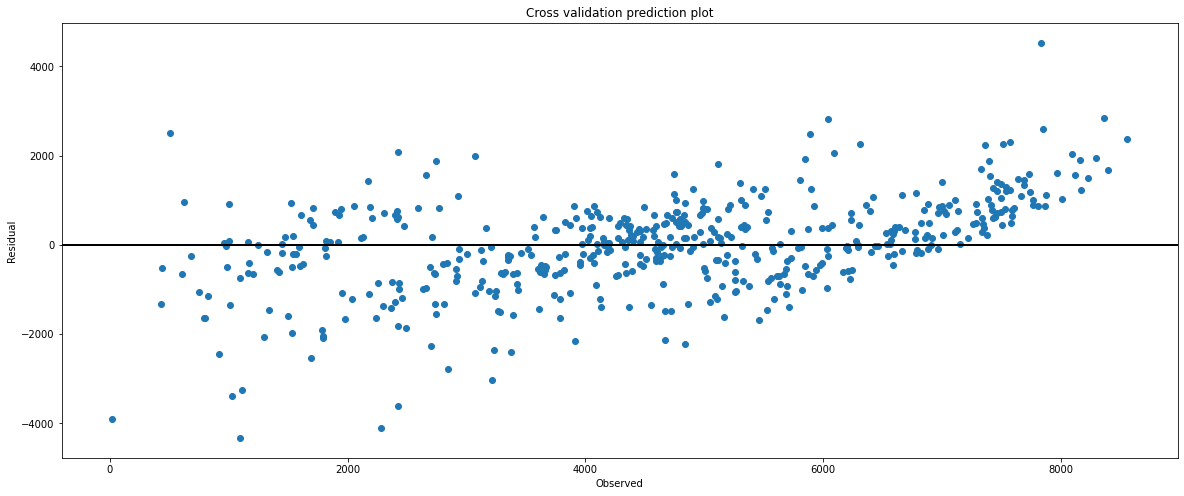

In [17]:
predict=cross_val_predict(lr,X_train,y_train,cv=3)

fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

From the cross validation prediction plot, we observed that it violates the homoscedasticity assumption
and it is nothing but if all the random variables sequence or vector have the same finite variance.

Model evalution metrics

R-squared and mean squared error scores

In [18]:
r2_scores = cross_val_score(lr, X_train, y_train, cv=3)
mse_scores = cross_val_score(lr, X_train, y_train, cv=3,scoring='neg_mean_squared_error')
print(r2_scores)
print(mse_scores) 

[0.71008202 0.70008719 0.71804588]
[-1057195.97031818 -1104706.5655267  -1139436.58308609]


Cross validation scores

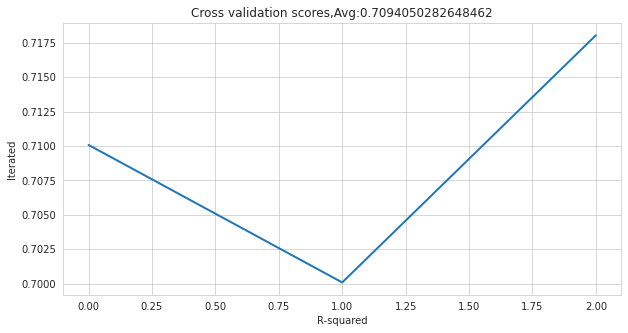

In [19]:
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(10,5))
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2 )
ax.set_xlabel('R-squared')#coefficeint of determination
ax.set_ylabel('Iterated')
ax.set_title('Cross validation scores,Avg:{}'.format(np.average(r2_scores)))
plt.show()

Test data performance

Split the test dataset to categorical and numerical features

In [22]:
test_features= X_test[['Season','Holiday','Weather','Month','Day','Year','Temp','Feel_Temp','Hum','Wind']]
numeric_features = ['Temp','Hum','Wind','Month','Year','Day']
test_cat_features =  ['Season','Holiday','Weather']

Decoding the test attributes

In [23]:
test_attributes=pd.get_dummies(test_features,columns=test_cat_features)
test_attributes.head()

,Month,Day,Year,Temp,Feel_Temp,Hum,Wind,Season_Fall,Season_Springer,Season_Summer,...,Weather_ Partly cloudy,Weather_Clear,Weather_Few clouds,Weather_Light Rain + Scattered clouds,Weather_Mist,Weather_Mist + Broken clouds,Weather_Mist + Cloudy,Weather_Mist + Few clouds,Weather_Rain + Thunderstorm,Weather_Snow
0,11.0,25.0,2020.0,9.625000,9.891537,0.643750,-6.626019e+00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,6.0,2021.0,18.045849,17.487724,0.611250,5.167375e+00,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,8.0,7.0,2021.0,26.584151,24.788187,0.703750,7.832836e+00,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,3.0,2020.0,0.786979,0.360266,0.437826,1.860938e+07,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,7.0,28.0,2021.0,27.524151,24.787388,0.613333,1.054245e+01,1,0,0,...,1,0,0,0,0,0,0,0,0,0


fit the model

In [25]:
X_test=test_attributes
y_test=y_test.cnt.values
lr.fit(X_test,y_test)

LinearRegression()

predict the model

In [26]:
y_pred=lr.predict(X_test)

Model evaluation metrics

**Root mean squared error and mean absolute error**

In [27]:

rmse=sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)

857.3857267860335
654.9547659174983


Residual plot

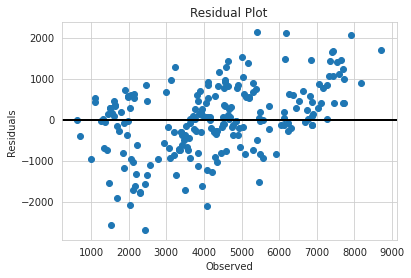

In [28]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test-y_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

From the linear regression anaysis, we can conclude that model not suitable for this problem due 
non linearirty of data.

Decision tree regressor

In [29]:
X_train=training_attributes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=40)

fit the model

In [30]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=40)

Decision tree regression accuracy score

In [31]:
dtr.score(X_train,y_train)

0.9290247542667821

Plot the learned model

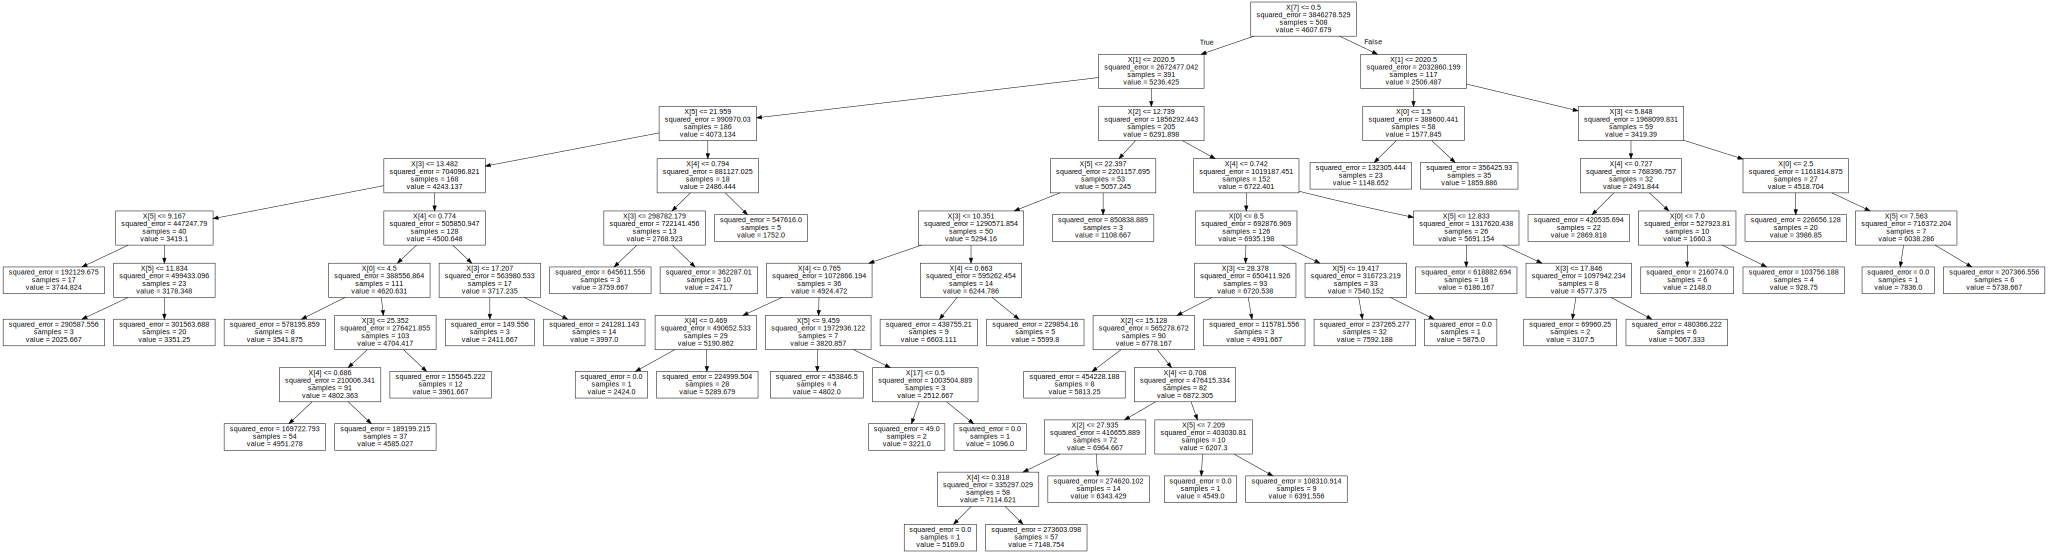

In [32]:
from sklearn import tree
import pydot
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

Randomized search cv with cross validation

In [33]:
from scipy.stats import randint as sp_randint
param_random = {"criterion": ["mse", "mae"],
              "min_samples_split": sp_randint(1, 5, 10),
              "max_depth": [2, 6, 8],
              "min_samples_leaf": sp_randint(5, 10,20),
              "max_leaf_nodes": sp_randint( 10, 20, 40),
              }

Trained the Random Search CV model

In [34]:
X_train=training_attributes

randomized_cv_dtr = RandomizedSearchCV(dtr, param_random, cv=3,random_state=32)

fit the model

In [35]:
randomized_cv_dtr.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(max_leaf_nodes=40),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 6, 8],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f96833b4bd0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f968334cb90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f968334c950>},
                   random_state=32)

model best score and best parameters

In [36]:
print(randomized_cv_dtr.best_score_)
print(randomized_cv_dtr.best_params_)

0.7280870251681694
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 55, 'min_samples_leaf': 26, 'min_samples_split': 13}


Parameter hypertuning  results

In [37]:
df=pd.DataFrame(data=randomized_cv_dtr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009107,0.000914,0.001899,0.000102,mae,6,56,29,13,"{'criterion': 'mae', 'max_depth': 6, 'max_leaf...",0.683623,0.611755,0.635674,0.643684,0.029882,8
1,0.002490,0.000079,0.001731,0.000047,mse,2,57,26,14,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.660275,0.612985,0.390165,0.554475,0.117778,10
2,0.008651,0.000103,0.001912,0.000064,mae,8,59,29,14,"{'criterion': 'mae', 'max_depth': 8, 'max_leaf...",0.683623,0.611755,0.635674,0.643684,0.029882,8
3,0.008334,0.000105,0.001760,0.000018,mae,6,52,28,11,"{'criterion': 'mae', 'max_depth': 6, 'max_leaf...",0.691424,0.611755,0.635674,0.646284,0.033379,7
4,0.002751,0.000057,0.001738,0.000053,mse,8,54,27,11,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf...",0.717820,0.710849,0.741306,0.723325,0.013029,3


Effect of depth and leaf nodes on model performance

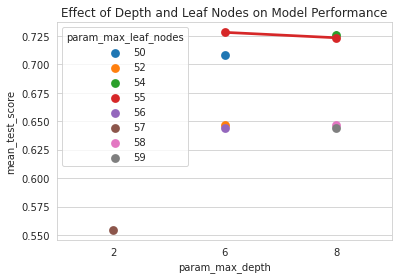

In [38]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")
plt.show()

Residual plot

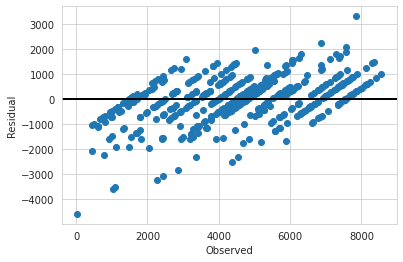

In [39]:
predicted = randomized_cv_dtr.best_estimator_.predict(X_train)
residuals = y_train.flatten()-predicted
fig, ax = plt.subplots()
ax.scatter(y_train.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

R-squared and mean squared error scores

In [40]:
r2_scores = cross_val_score(randomized_cv_dtr.best_estimator_, X_train, y_train, cv=3)
print(r2_scores)
mse_scores = cross_val_score(randomized_cv_dtr.best_estimator_, X_train, y_train, cv=3,scoring='neg_mean_squared_error')
print(mse_scores)

[0.731676   0.71103742 0.74154765]
[ -978452.76087361 -1064372.19511215 -1044460.91481632]
